# HM Land Registry Price Paid Data (PPD)

## Introduction
The Price Paid Data (PPD) is a publicly available dataset published by HM Land Registry, which records property transactions across England and Wales. It provides valuable information about property sales, including the price paid, property type, tenure, and address details. This dataset is regularly updated to ensure accuracy and completeness.

First released on 24 July 2014, the dataset is continuously maintained and updated, with the most recent update on 29 January 2025. The data can be downloaded in CSV or text (TXT) format, allowing easy integration into research, financial analysis, and real estate studies.

The December 2024 update contains transactions recorded from the first to the last day of the month and includes both Standard Price Paid Data (SPPD) and Additional Price Paid Data (APPD) transactions. The dataset is structured to facilitate market trend analysis, property valuation, and investment decision-making. The link of the dataset: https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads.

## Data Structure and Fields

The Price Paid Data includes the following key fields:
1. Transaction Details

    Transaction Price (£) – The price paid for the property.
    
    Date of Sale – The official date of property ownership transfer.
    
    Property Type – Categorized as:

        D – Detached

        S – Semi-detached

        T – Terraced

        F – Flats/Maisonettes

        O – Other (e.g., land, commercial properties)
    
    New Build Indicator – Specifies whether the property is newly built (Y/N).
    
    Tenure Type – Specifies whether the property is:

        F – Freehold

        L – Leasehold

2. Address Details

    Postcode – The postal code for location identification.
    
    PAON (Primary Addressable Object Name) – Typically the house number or name.
    
    SAON (Secondary Addressable Object Name) – Used if the property is divided into flats or sub-units (e.g., Apartment 102).
    
    Street – The street where the property is located.
    
    Locality – Additional address details, if applicable.
    
    Town/City – The name of the town or city.
    
    District – The local government district.
    
    County – The county in which the property is located.

3. Transaction Categories

    PPD Category Type:

        A – Standard transactions (individual property sales).
        B – Additional transactions (bulk sales, commercial transactions).
    
    Record Status:

        A – Valid entry.
        C – Corrected entry.
        D – Deleted record (e.g., due to errors).

Import the necessaries libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\OWOADE BAMIDELE\Desktop\projects\emmanuel.elaho@gmail.com\data\Land Registry Price Paid Data (PPD).xlsx")
df.head(20)

,Code,Price,Date of Transfer,Postcode,Property Type,New Build,Tenure,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Street,Locality,Town/City,District,County,PPD Category Type,Record Status
0,{2ACACE8D-47C7-295E-E063-4804A8C0B0EB},114000,2021-02-26,S63 7FR,S,N,L,28,NaN,REED WALK,WATH UPON DEARNE,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
1,{2ACACE8D-4887-295E-E063-4804A8C0B0EB},158995,2021-03-11,S5 8DL,T,N,F,86,NaN,ADRIAN CRESCENT,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
2,{2ACACE8D-48AF-295E-E063-4804A8C0B0EB},60000,2021-10-07,S36 2DX,T,N,F,550,NaN,MANCHESTER ROAD,STOCKSBRIDGE,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
3,{2ACACE8D-48DC-295E-E063-4804A8C0B0EB},295000,2021-07-21,S10 4GQ,S,N,F,14C,NaN,SCHOOL GREEN LANE,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
4,{2ACACE8D-4925-295E-E063-4804A8C0B0EB},180995,2021-06-09,S61 1AD,D,Y,F,46,NaN,LEATHAM AVENUE,NaN,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
5,{2ACACE8D-4938-295E-E063-4804A8C0B0EB},351000,2021-10-22,S6 5BW,T,Y,F,3,NaN,LARK STREET,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
6,{2ACACE8D-4940-295E-E063-4804A8C0B0EB},339995,2021-10-29,S60 5GB,D,Y,F,8,NaN,WINDERS WAY,TREETON,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
7,{2ACACE8D-4A90-295E-E063-4804A8C0B0EB},715000,2021-06-30,SW11 3TR,F,N,L,9G,NaN,THORNEY CRESCENT,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A
8,{2ACACE8D-4C45-295E-E063-4804A8C0B0EB},315000,2021-11-18,SE5 8SG,F,N,L,31,NaN,ALLENDALE CLOSE,NaN,LONDON,SOUTHWARK,GREATER LONDON,A,A
9,{2ACACE8D-4D94-295E-E063-4804A8C0B0EB},2112000,2021-11-10,SW11 8BB,F,Y,L,SWITCH HOUSE EAST BATTERSEA POWER STATION,APARTMENT 102,CIRCUS ROAD EAST,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77791 entries, 0 to 77790
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Code                                       77791 non-null  object        
 1   Price                                      77791 non-null  int64         
 2   Date of Transfer                           77791 non-null  datetime64[ns]
 3   Postcode                                   77577 non-null  object        
 4   Property Type                              77791 non-null  object        
 5   New Build                                  77791 non-null  object        
 6   Tenure                                     77791 non-null  object        
 7   Primary Addressable Object Name (PAON)     77791 non-null  object        
 8   Secondary Addressable Object Name (SAON)   11407 non-null  object        
 9   Street           

In [4]:
df.isnull().sum()

Code                                             0
Price                                            0
Date of Transfer                                 0
Postcode                                       214
Property Type                                    0
New Build                                        0
Tenure                                           0
Primary Addressable Object Name (PAON)           0
Secondary Addressable Object Name (SAON)     66384
Street                                        1241
Locality                                     47381
Town/City                                        0
District                                         0
County                                           0
PPD Category Type                                0
Record Status                                    0
dtype: int64

## Data Preprocessing

In [5]:
# List of columns with missing values (based on the image)
columns_to_fill = [
    "Postcode", "Secondary Addressable Object Name (SAON)", "Street", "Locality"
]

In [6]:
# Ensure all column names are properly formatted (remove extra spaces)
df.columns = df.columns.str.strip()

In [7]:
# Check which columns exist in the DataFrame
existing_columns = [col for col in columns_to_fill if col in df.columns]

In [8]:
# Replace NaN values with "Unknown" only in existing columns
df[existing_columns] = df[existing_columns].fillna("Unknown")

In [9]:
# Display the first 10 rows to verify
print(df.head(10))

                                     Code    Price Date of Transfer  Postcode  \
0  {2ACACE8D-47C7-295E-E063-4804A8C0B0EB}   114000       2021-02-26   S63 7FR   
1  {2ACACE8D-4887-295E-E063-4804A8C0B0EB}   158995       2021-03-11    S5 8DL   
2  {2ACACE8D-48AF-295E-E063-4804A8C0B0EB}    60000       2021-10-07   S36 2DX   
3  {2ACACE8D-48DC-295E-E063-4804A8C0B0EB}   295000       2021-07-21   S10 4GQ   
4  {2ACACE8D-4925-295E-E063-4804A8C0B0EB}   180995       2021-06-09   S61 1AD   
5  {2ACACE8D-4938-295E-E063-4804A8C0B0EB}   351000       2021-10-22    S6 5BW   
6  {2ACACE8D-4940-295E-E063-4804A8C0B0EB}   339995       2021-10-29   S60 5GB   
7  {2ACACE8D-4A90-295E-E063-4804A8C0B0EB}   715000       2021-06-30  SW11 3TR   
8  {2ACACE8D-4C45-295E-E063-4804A8C0B0EB}   315000       2021-11-18   SE5 8SG   
9  {2ACACE8D-4D94-295E-E063-4804A8C0B0EB}  2112000       2021-11-10  SW11 8BB   

  Property Type New Build Tenure     Primary Addressable Object Name (PAON)  \
0             S         N    

In [10]:
# Confirm missing values are removed
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 Code                                        0
Price                                       0
Date of Transfer                            0
Postcode                                    0
Property Type                               0
New Build                                   0
Tenure                                      0
Primary Addressable Object Name (PAON)      0
Secondary Addressable Object Name (SAON)    0
Street                                      0
Locality                                    0
Town/City                                   0
District                                    0
County                                      0
PPD Category Type                           0
Record Status                               0
dtype: int64


In [11]:
# Drop the 'Code' column
df = df.drop('Code', axis=1)

# Verify the column has been removed
print("Updated columns:", df.columns.tolist())

Updated columns: ['Price', 'Date of Transfer', 'Postcode', 'Property Type', 'New Build', 'Tenure', 'Primary Addressable Object Name (PAON)', 'Secondary Addressable Object Name (SAON)', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPD Category Type', 'Record Status']


In [20]:
# Define the columns to analyze
columns_to_check = ['Property Type', 'New Build', 'Tenure', 'Locality', 
                    'Town/City', 'District', 'County', 'PPD Category Type', 'Record Status']

# Loop through each column and display the frequency and percentage
for col in columns_to_check:
    print(f"\nColumn: {col}")
    freq_table = df[col].value_counts(dropna=False)  # Count occurrences, including NaNs
    percentage = (freq_table / len(df)) * 100  # Calculate percentage
    
    # Combine frequency and percentage into a DataFrame for better readability
    result = pd.DataFrame({'Count': freq_table, 'Percentage (%)': percentage.round(2)})
    
    print(result)


Column: Property Type
               Count  Percentage (%)
Property Type                       
S              20814           26.76
T              19839           25.50
D              18220           23.42
F              15142           19.46
O               3776            4.85

Column: New Build
           Count  Percentage (%)
New Build                       
N          66776           85.84
Y          11015           14.16

Column: Tenure
        Count  Percentage (%)
Tenure                       
F       58699           75.46
L       19092           24.54

Column: Locality
                     Count  Percentage (%)
Locality                                  
Unknown              47381           60.91
GREAT WARLEY           212            0.27
SHIRLEY                124            0.16
NORTHFLEET              67            0.09
WORSLEY                 65            0.08
...                    ...             ...
TRESAITH                 1            0.00
NORTH ELKINGTON          1

In [24]:
# Define columns for bar charts
bar_chart_columns = ['Property Type', 'New Build', 'Tenure', 'PPD Category Type', 'Record Status']

# Define columns for word clouds
wordcloud_columns = ['Locality', 'Town/City', 'District', 'County']

# Set style
sns.set_style("whitegrid")

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_28252\744775490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")


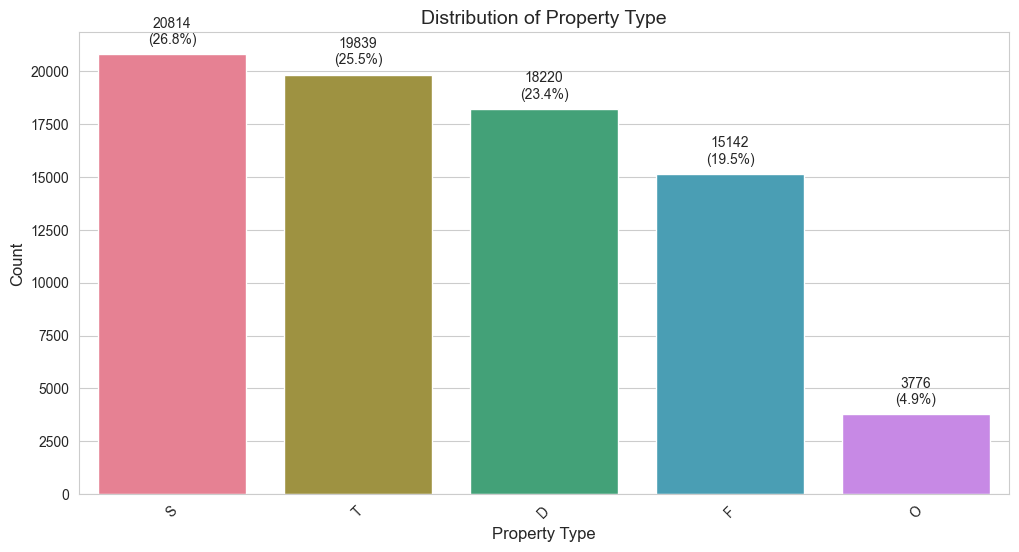

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_28252\744775490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")


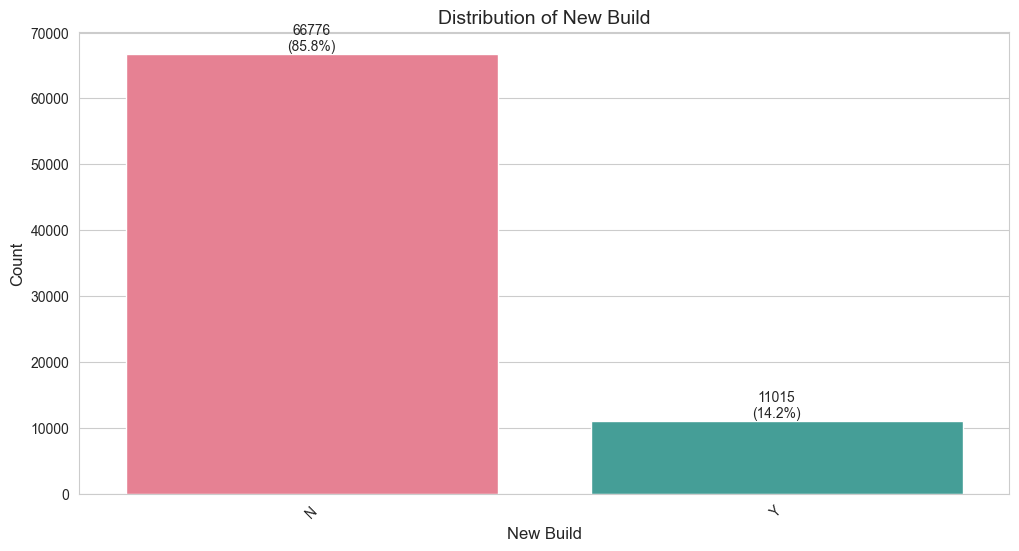

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_28252\744775490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")


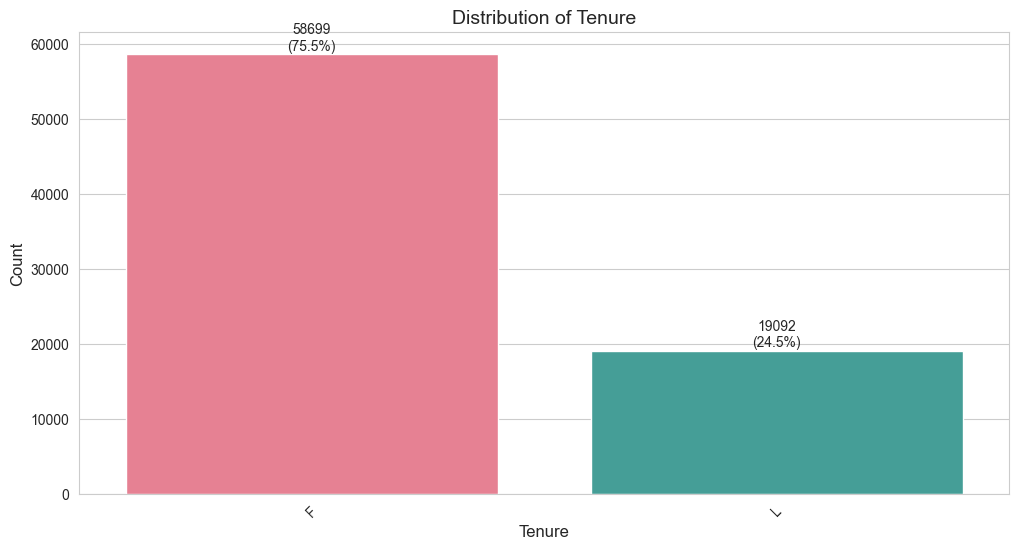

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_28252\744775490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")


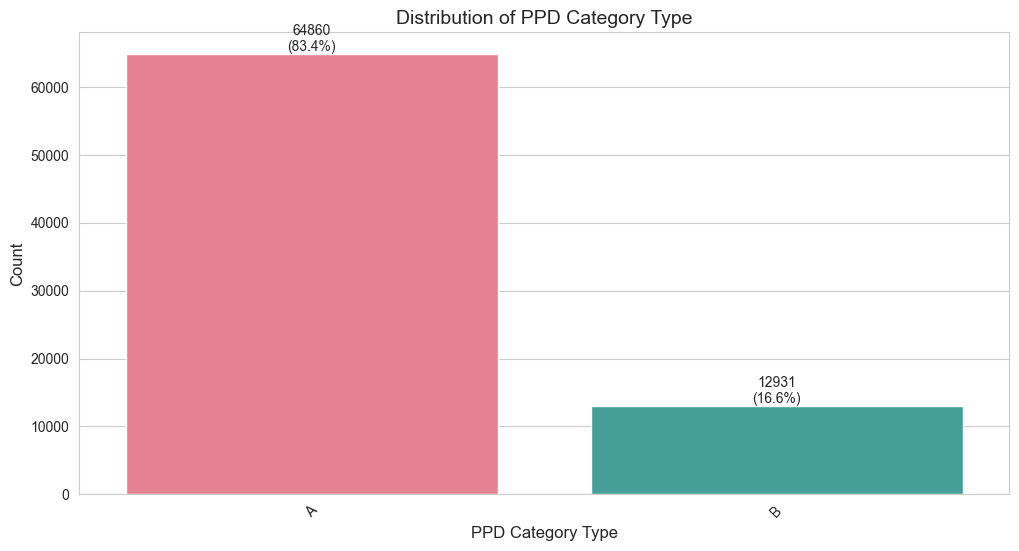

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_28252\744775490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")


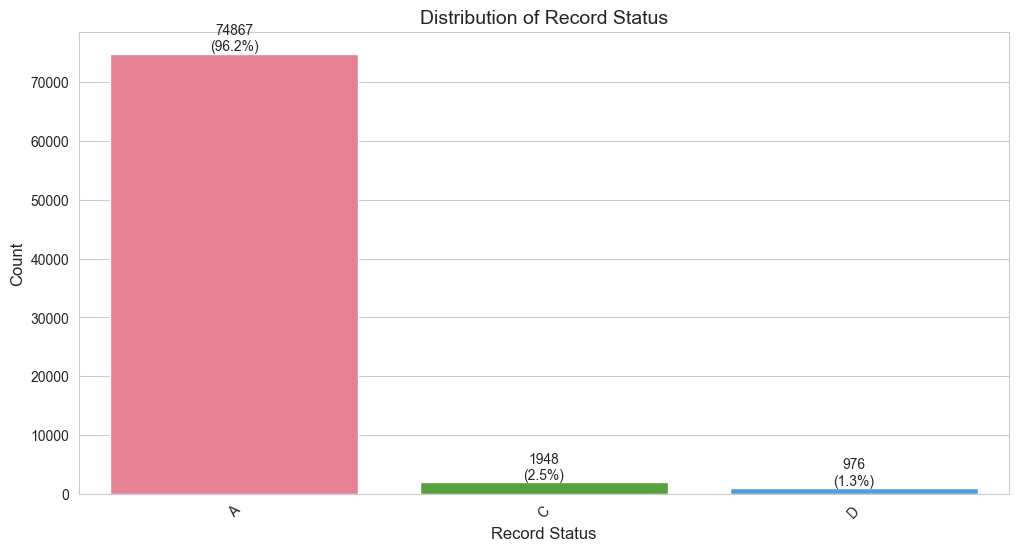

In [28]:
# BAR CHARTS
for col in bar_chart_columns:
    plt.figure(figsize=(12, 6))
    freq_table = df[col].value_counts(dropna=False)  # Frequency count

    # Create bar plot with different colors
    sns.barplot(x=freq_table.index, y=freq_table.values, palette="husl")

    # Add text labels
    for i, v in enumerate(freq_table.values):
        plt.text(i, v + 500, f"{v}\n({round((v / len(df)) * 100, 1)}%)", ha='center', fontsize=10)

# Customize the chart
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

These six charts provide a comprehensive view of different housing-related metrics in what appears to be UK housing data. I'll analyze each one in detail:

Image 1: "Distribution of Property Type" shows the breakdown of properties by type, using single-letter codes. Type "S" has the highest count at 20,814 properties (26.8% of the total), followed closely by type "T" with 19,839 properties (25.5%). Type "D" represents 18,220 properties (23.4%), while type "F" accounts for 15,142 properties (19.5%). The least common is type "O" with only 3,776 properties (4.9%). Though the labels are abbreviated, these likely represent Semi-detached, Terraced, Detached, Flat/Apartment, and Other property types, respectively, which are standard UK housing categories.

Images 2 and 3: These identical charts titled "Distribution of New Build" display the proportion of new versus existing properties. The overwhelming majority (66,776 properties or 85.8%) are labeled "N," which likely indicates they are not new builds. Only 11,015 properties (14.2%) are labeled "Y," representing new builds. This significant disparity highlights that newly constructed properties form a relatively small portion of the overall housing stock.

Image 4: "Distribution of Tenure" illustrates the ownership status of properties. The majority (58,699 properties or 75.5%) are categorized as "F," which likely represents Freehold properties where the owner possesses both the building and the land. The remaining 19,092 properties (24.5%) are labeled "L," presumably indicating Leasehold properties where the occupant owns the building but not the land. This distribution reflects the predominance of freehold tenure in the UK housing market.

Image 5: "Distribution of PPD Category Type" shows two categories labeled "A" and "B". Category "A" is significantly more common with 64,860 properties (83.4%), while category "B" accounts for only 12,931 properties (16.6%). Although the specific meaning of these PPD (Price Paid Data) categories isn't clear from the chart alone, they likely relate to transaction types in the UK Land Registry's price paid dataset.

Image 6: "Distribution of Record Status" shows an overwhelming majority of records (74,867 or 96.2%) with status "A," which likely indicates "Active" or "Approved" records. Status "C" represents only 1,948 records (2.5%), and status "D" is even less common with 976 records (1.3%). These probably represent different administrative statuses like "Changed" and "Deleted" or similar designations in the housing database.

Across all charts, there's a consistent pattern of one category being substantially more common than others, suggesting that the UK housing market has dominant characteristics: most properties are not new builds, are freehold rather than leasehold, and have active record status, with a relatively even distribution among the main housing types (semi-detached, terraced, detached, and flats).

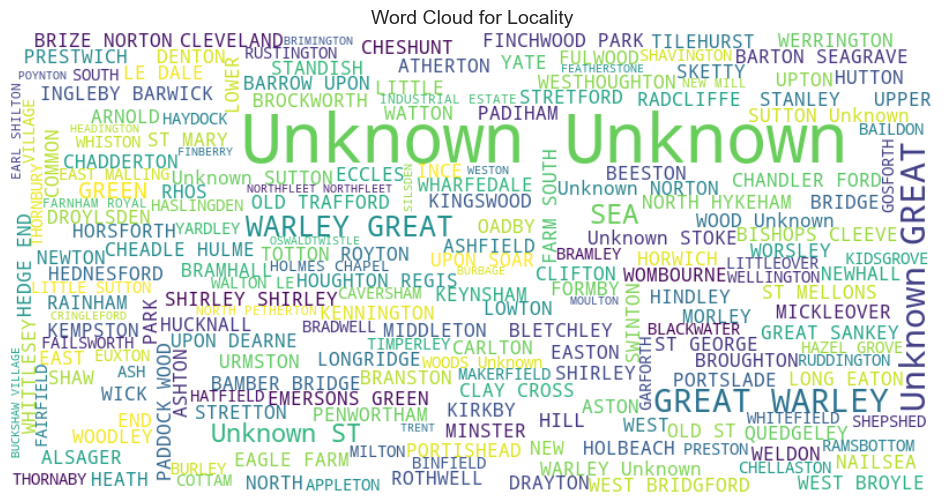

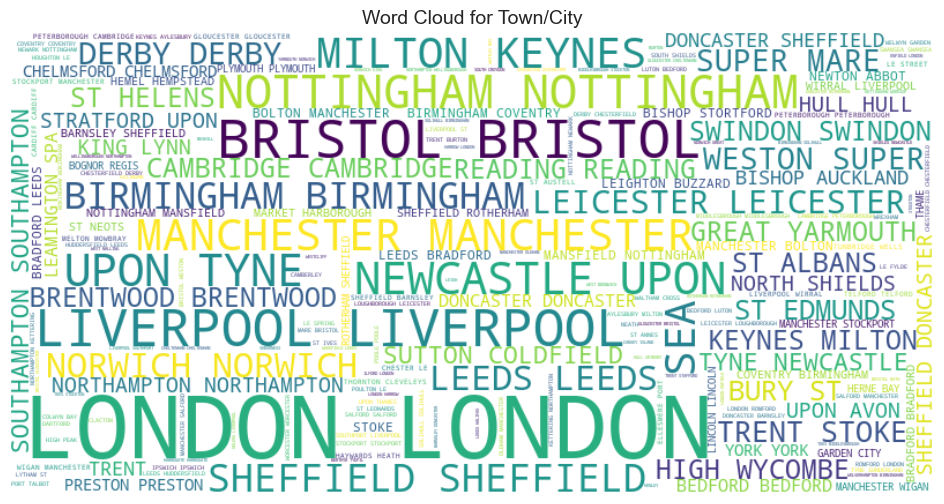

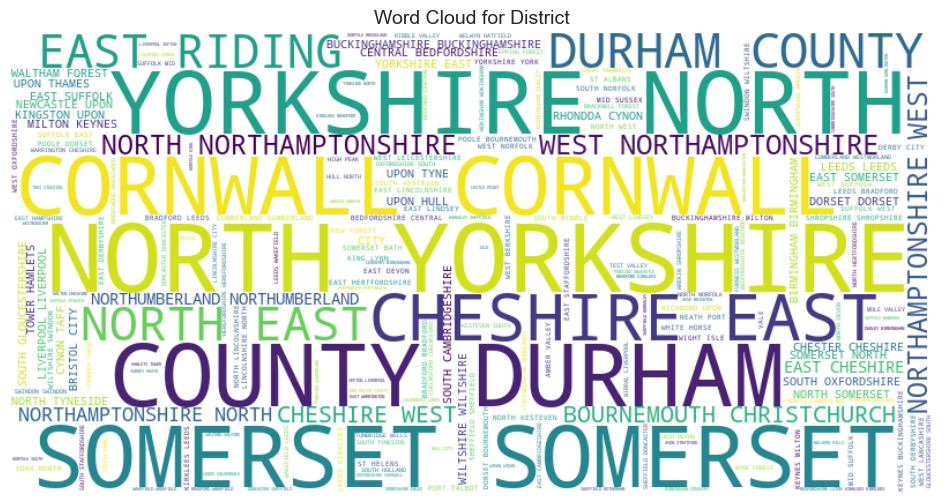

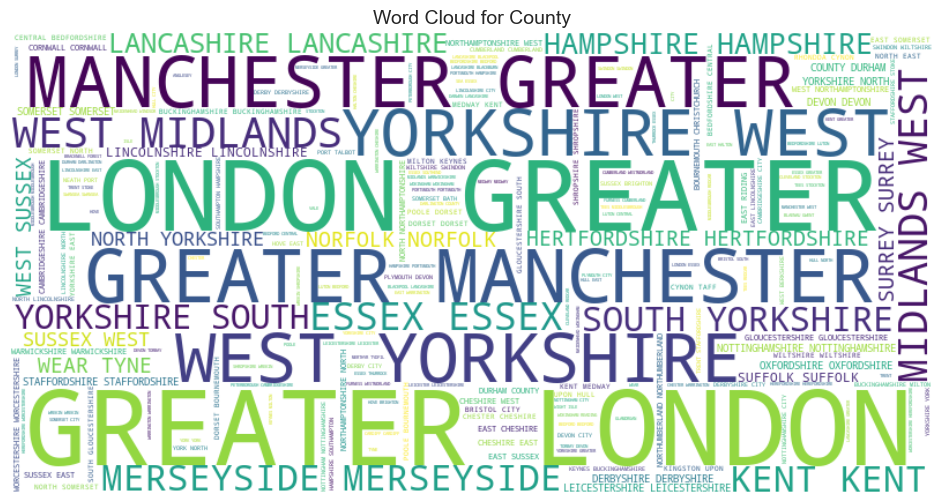

In [29]:
# WORD CLOUDS
for col in wordcloud_columns:
    text = ' '.join(df[col].dropna().astype(str))  # Combine all text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {col}", fontsize=14)
    
    # Show the plot
    plt.show()

The above appear to show place names in the UK at different levels of geographic classification in word cloud images.

Image 1 is titled "Word Cloud for Locality" and shows smaller locations and neighborhoods. The most prominent terms include "Unknown," "Great Warley," and numerous smaller localities like "Ingleby," "Barwick," "Brockworth," "Wharfedale," and "Shirley." These appear to be smaller communities, villages, and areas within larger towns.

Image 2 is titled "Word Cloud for Town/City" and clearly shows major UK cities with the most prominent being "London," "Bristol," "Birmingham," "Manchester," "Liverpool," "Leeds," "Nottingham," and "Milton Keynes." This represents urban centers throughout England.

Image 3 is titled "Word Cloud for District" and displays larger regional areas, with the most prominent terms being "Yorkshire," "Cornwall," "North Yorkshire," "County Durham," "Somerset," and "East Riding." These represent administrative districts or traditional county subdivisions.

Image 4 is titled "Word Cloud for County" and shows the highest level of regional classification with the largest terms being "Greater London," "Greater Manchester," "West Yorkshire," "Yorkshire," and other county-level designations like "Lancashire," "Hampshire," "Essex," and "Kent."

Together, these word clouds represent a hierarchical view of UK geographic classifications from small localities up to county level, with word size indicating the frequency or significance of each place name in the dataset.